# Aula5 NoSQL com Python 🧪

Nesta aula, vamos explorar **4 tipos de bancos de dados NoSQL** com exemplos práticos utilizando bibliotecas Python que simulam ou se conectam com os bancos reais.

## 📚 Introdução aos Bancos NoSQL

Os bancos NoSQL surgiram para resolver limitações dos bancos relacionais em cenários de:

- Alta escalabilidade
- Alta disponibilidade
- Dados sem estrutura fixa
- Velocidade de leitura/escrita em larga escala

### Tipos de Bancos NoSQL:

| Tipo         | Banco Exemplo  | Características principais                             |
|--------------|----------------|--------------------------------------------------------|
| Documento    | MongoDB        | Armazena documentos JSON/BSON                          |
| Chave-Valor  | Redis          | Extremamente rápido, ideal para cache e sessões        |
| Colunar      | Cassandra      | Armazena grandes volumes com leitura distribuída       |
| Grafos       | Neo4j, NetworkX| Foco em relacionamentos e redes (amigos, caminhos, etc)|

## 🧩 O que é CRUD?

CRUD é um acrônimo que representa as **4 operações básicas** que podem ser realizadas sobre dados persistidos em um sistema:

| Letra | Operação | Significado                | Equivalente em SQL |
|-------|----------|----------------------------|---------------------|
| C     | Create   | Criar um novo registro     | `INSERT INTO`       |
| R     | Read     | Ler/consultar dados        | `SELECT`            |
| U     | Update   | Atualizar dados existentes | `UPDATE`            |
| D     | Delete   | Remover dados              | `DELETE FROM`       |

### 🎯 Por que o CRUD é importante?

- É a base de qualquer aplicação de dados: **sistemas web, APIs, bancos e microsserviços**
- Permite **manipular registros de forma estruturada e padronizada**
- Está presente em **REST APIs**, **bancos relacionais e NoSQL**, e até em **arquiteturas serverless**

---

### ✅ Casos de uso mais comuns do MongoDB:

| Cenário                         | Por que usar MongoDB?                                                                 |
|---------------------------------|----------------------------------------------------------------------------------------|
| 🌐 **Aplicações Web**           | Armazena usuários, produtos, posts, comentários em documentos aninhados               |
| 📱 **APIs REST e GraphQL**      | Retorna JSON diretamente dos documentos sem transformações complexas                  |
| ⚙️ **Microsserviços**           | Cada serviço pode ter sua própria coleção com schema flexível                         |
| 🛒 **E-commerce**               | Produtos com atributos dinâmicos (ex: cor, tamanho, estoque, avaliações)              |
| 🧾 **Logs e eventos**           | Ingestão rápida de dados sem schema fixo                                              |
| 🎯 **Plataformas de recomendação** | Permite armazenar perfis, preferências e histórico de usuários em documentos únicos |
| 🧠 **Aplicações com IA ou Analytics** | Armazena resultados de inferência, metadados e dados heterogêneos               |

---

### 🧠 Por que o MongoDB é tão usado?

- 💡 **Sem schema fixo**: ideal para dados que mudam com frequência  
- ⚡ **Escalabilidade horizontal** com sharding nativo  
- 🔄 **Documentos aninhados** → evita joins e melhora performance  
- 🌍 **Alta disponibilidade** com réplicas automáticas  
- 🧩 **Integração fácil** com JavaScript, Node.js, Python, etc.

---

A seguir, veremos exemplos de comandos e operações em **Redis**, **Cassandra** e **Grafos**, com explicações e simulações práticas.


## 1. 🗃️ MongoDB com `mongomock`

## 🗃️ `mongomock` – Biblioteca para simular MongoDB em memória

A biblioteca `mongomock` é uma alternativa leve e útil para simular o comportamento do MongoDB localmente, **sem a necessidade de instalar ou conectar-se a um servidor real**.

Ela é amplamente usada em **testes automatizados**, prototipagem, ambientes educacionais e notebooks onde se deseja testar lógica MongoDB sem infraestrutura.

Internamente, ela utiliza estruturas de dados Python (como `dict` e `list`) para replicar o comportamento dos comandos do `pymongo`.

---

### ✅ Como instalar

In [ ]:
%pip install mongomock

### 🧰 Funções e métodos utilizados

| Função / Método                     | Explicação                                                                |
|------------------------------------|---------------------------------------------------------------------------|
| `mongomock.MongoClient()`          | Cria uma instância mock do cliente MongoDB                                |
| `client['nome_do_banco']`          | Acessa um banco de dados dentro da conexão                                |
| `db['nome_da_colecao']`            | Acessa uma coleção dentro do banco mockado                                |
| `insert_one(documento)`            | Insere um documento JSON-like na coleção                                  |
| `find(filtro)`                     | Retorna todos os documentos que atendem a um filtro (como SELECT * WHERE) |
| `update_one(filtro, {"$set": {}})` | Atualiza um campo específico em um único documento                        |
| `delete_one(filtro)`               | Remove o primeiro documento que atende ao critério do filtro              |
| `list(collection.find())`          | Transforma o cursor de resultados em uma lista Python                     |
| `pprint(lista)`                    | Imprime os dados formatados para facilitar a leitura                      |


## 🧪 Exemplo prático com `mongomock` – CRUD completo com explicações

Este exemplo simula o comportamento do MongoDB localmente usando a biblioteca `mongomock`. A seguir, executaremos os comandos CRUD.

---


In [ ]:
# Importa a biblioteca mongomock para simular o MongoDB em memória
import mongomock

# Importa pprint para imprimir documentos de forma mais legível
from pprint import pprint

---

### 🔗 Conexão com o "banco" e criação da coleção

In [ ]:
# Cria uma conexão simulada com o MongoDB (sem servidor real)
client = mongomock.MongoClient()

# Acessa ou cria o banco de dados chamado 'loja'
db = client['loja']

# Acessa ou cria a coleção 'produtos' dentro do banco
produtos = db['produtos']

---

### 📥 Create – Inserção de documento

In [ ]:
# Insere um documento na coleção 'produtos'
produtos.insert_one({"nome": "Camiseta", "preco": 49.9})

# Mostra todos os documentos da coleção após a inserção
print("Após inserção:")
pprint(list(produtos.find()))

### 🔍 Analisando os campos do documento

#### `_id: ObjectId(...)`
- O MongoDB (e também o `mongomock`) cria automaticamente um campo chamado `_id` em todo documento inserido.
- Esse campo serve como **identificador único** do documento dentro da coleção.
- O `ObjectId` é um valor gerado automaticamente que garante unicidade.
- Mesmo sendo uma simulação, o formato gerado por `mongomock` é visualmente semelhante ao do MongoDB real.


#### `'nome': 'Camiseta'`
- Este é o campo de **nome do produto**.
- Foi definido manualmente durante a inserção.
- No caso, o valor `"Camiseta"` representa o nome do item cadastrado.


#### `'preco': 49.9`
- Representa o campo de **preço do produto**.
- Também foi informado na inserção e armazena o valor numérico `49.9`.


### 🧠 Importância do campo `_id`

O campo `_id` é **obrigatório e exclusivo** em todo documento do MongoDB:

- Serve para identificar cada documento de forma única.
- Permite buscas diretas e otimizadas usando:

```python
db.produtos.find({'_id': ObjectId('...')})
```

- Evita duplicações, pois dois documentos não podem ter o mesmo _id.


## 📦 Inserindo documentos em lote no MongoDB com `insert_many()`

Ao invés de inserir documentos um por um com `insert_one()`, podemos usar `insert_many()` para realizar **inserções em lote**, de forma mais eficiente e organizada.

---

### ✅ Sintaxe básica:


In [ ]:
produtos.insert_many([
    {"nome": "Camiseta", "preco": 49.9},
    {"nome": "Calça Jeans", "preco": 89.9},
    {"nome": "Tênis", "preco": 199.9},
    {"nome": "Boné", "preco": 29.9}
])

In [ ]:
# Insere múltiplos documentos na coleção 'produtos'

produtos.insert_many([
    {
        "nome": "Camiseta",
        "preco": 49.90,
        "estoque": 20,
        "avaliacoes": [
            {"cliente": "Ana", "nota": 5},
            {"cliente": "Bruno", "nota": 4}
        ]
    },
    {
        "nome": "Calça Jeans",
        "preco": 89.90,
        "estoque": 15,
        "avaliacoes": [
            {"cliente": "Carlos", "nota": 4}
        ]
    },
    {
        "nome": "Tênis Esportivo",
        "preco": 199.90,
        "estoque": 8,
        "avaliacoes": [
            {"cliente": "Daniela", "nota": 5},
            {"cliente": "Eduardo", "nota": 3}
        ]
    },
    {
        "nome": "Boné",
        "preco": 29.90,
        "estoque": 50,
        "avaliacoes": [
            {"cliente": "Fernanda", "nota": 4}
        ]
    },
    {
        "nome": "Jaqueta Corta-Vento",
        "preco": 149.90,
        "estoque": 10,
        "avaliacoes": [
            {"cliente": "Gabriel", "nota": 5},
            {"cliente": "Helena", "nota": 5}
        ]
    },
    {
        "nome": "Meia",
        "preco": 9.90,
        "estoque": 100,
        "avaliacoes": [
            {"cliente": "Igor", "nota": 3}
        ]
    },
    {
        "nome": "Relógio Digital",
        "preco": 299.90,
        "estoque": 5,
        "avaliacoes": [
            {"cliente": "Joana", "nota": 4}
        ]
    },
    {
        "nome": "Óculos de Sol",
        "preco": 119.90,
        "estoque": 12,
        "avaliacoes": [
            {"cliente": "Karina", "nota": 5},
            {"cliente": "Lucas", "nota": 4}
        ]
    },
    {
        "nome": "Mochila",
        "preco": 139.90,
        "estoque": 7,
        "avaliacoes": [
            {"cliente": "Marcos", "nota": 3}
        ]
    },
    {
        "nome": "Carteira",
        "preco": 69.90,
        "estoque": 25,
        "avaliacoes": [
            {"cliente": "Nina", "nota": 4}
        ]
    }
])


Cada elemento da lista é um **dicionário Python**, representando um **documento MongoDB**.

Os documentos são inseridos **todos de uma vez** na coleção `produtos`.

O MongoDB atribui um campo **`_id` automaticamente** a cada documento, caso ele não seja fornecido.

---

### 🔍 Acessando os IDs inseridos

```python
resultado = produtos.insert_many([
    {"nome": "Camiseta", "preco": 49.9},
    {"nome": "Calça Jeans", "preco": 89.9}
])

print(resultado.inserted_ids)
```

- O objeto `resultado` é do tipo **`InsertManyResult`**.
- O atributo **`.inserted_ids`** retorna uma **lista com os `_id` de cada documento** inserido com sucesso.

---

### 🧠 Por que usar `insert_many()`?

- **Performance**: reduz a sobrecarga de múltiplas conexões com o banco.
- **Produtividade**: permite montar testes e cargas iniciais com poucos comandos.
- **Organização**: melhora a legibilidade do código em casos com muitos documentos.


### ⚠️ Cuidados

- Se algum documento violar uma restrição (como duplicação de `_id`), a operação pode lançar uma exceção e:
  - Não inserir nenhum item, **ou**
  - Inserir apenas os válidos (dependendo da configuração).
- É recomendável **validar os dados antes** de inseri-los em lote.


### 📖 Como ler documentos após `insert_many()` no MongoDB

Após inserir os documentos com `insert_many()`, você pode ler (consultar) os dados da coleção usando o método `.find()` do MongoDB, que retorna todos os documentos da coleção (ou os que atendem a um filtro).

---

### ✅ Ler todos os documentos



In [ ]:
for doc in produtos.find():
    print(doc)

---

### 🔍 Ler com filtro (exemplo: produtos com preço menor que 100)

In [ ]:
for doc in produtos.find({"preco": {"$lt": 100}}):
    print(doc)


* $lt: operador de comparação "menor que" (less than)

### 🖨️ Ler todos os documentos e imprimir de forma organizada (`pprint`)

In [ ]:
# Importa a função pprint ("pretty print") da biblioteca padrão
# Ela é usada para imprimir estruturas de dados (como listas de dicionários)
# de forma organizada, com identação automática e fácil leitura visual.
from pprint import pprint


pprint(list(produtos.find()))

- O método `.find()` retorna um **cursor**, que é um iterador sobre os documentos da coleção.
- A função `list()` **converte o cursor em uma lista** de dicionários Python.
- A função `pprint()` **imprime essa lista com formatação identada e legível**, facilitando a visualização, especialmente em contextos de:

  - **Aulas**
  - **Apresentações**
  - **Depuração de dados**


---

## 📚 Principais comandos `.find()` no MongoDB

| Comando | Descrição |
|--------|-----------|
| `db.colecao.find()` | Retorna todos os documentos da coleção |
| `db.colecao.find({campo: valor})` | Filtra documentos com base em um valor exato |
| `db.colecao.find({}, {campo1: 1, campo2: 0})` | Projeta campos específicos (inclusão ou exclusão) |
| `db.colecao.find().sort({campo: 1})` | Ordena documentos (1 = crescente, -1 = decrescente) |
| `db.colecao.find().limit(n)` | Limita a quantidade de resultados retornados |
| `db.colecao.find().skip(n)` | Ignora os primeiros n resultados |
| `db.colecao.find({campo: {$exists: true}})` | Filtra documentos que possuem determinado campo |
| `db.colecao.find({campo: {$type: "string"}})` | Filtra documentos pelo tipo de dado de um campo |

---

## 🔧 Operadores de Comparação

| Operador | Descrição |
|----------|-----------|
| `$eq` | Igual a (`{preco: {$eq: 50}}`) |
| `$ne` | Diferente de (`{preco: {$ne: 100}}`) |
| `$gt` | Maior que (`{preco: {$gt: 100}}`) |
| `$gte` | Maior ou igual a (`{preco: {$gte: 50}}`) |
| `$lt` | Menor que (`{preco: {$lt: 100}}`) |
| `$lte` | Menor ou igual a (`{preco: {$lte: 200}}`) |
| `$in` | Dentro de uma lista (`{nome: {$in: ["Camisa", "Calça"]}}`) |
| `$nin` | Fora de uma lista (`{nome: {$nin: ["Tênis", "Boné"]}}`) |

---

## 🧠 Operadores Lógicos

| Operador | Descrição |
|----------|-----------|
| `$and` | Todos os critérios devem ser verdadeiros |
| `$or` | Pelo menos um dos critérios deve ser verdadeiro |
| `$not` | Inverte a condição |
| `$nor` | Nenhum dos critérios pode ser verdadeiro |

### Exemplo com `$and`:

```javascript
db.produtos.find({
  $and: [
    { preco: { $gt: 50 } },
    { preco: { $lt: 200 } }
  ]
})
```

---

## 🔍 Operadores de Elemento

| Operador  | Descrição                             |
|-----------|----------------------------------------|
| `$exists` | Verifica se o campo existe             |
| `$type`   | Verifica o tipo de dado do campo       |

---

## 🔄 Operadores para Arrays

| Operador     | Descrição                                                                 |
|--------------|---------------------------------------------------------------------------|
| `$all`       | Todos os elementos especificados devem estar presentes no array           |
| `$size`      | Filtra documentos onde o array tem o tamanho exato especificado           |
| `$elemMatch` | Combina elementos de arrays que atendem a múltiplos critérios simultâneos |



## 📌 Exemplos de Operadores no MongoDB `.find()`

---

### 1. `$eq` – Igual a


In [ ]:
for doc in produtos.find({ "preco": { "$eq": 49.9 } }):
    print(doc)


### 2. `$gt` – Maior que

In [ ]:
for doc in produtos.find({ "preco": { "$gt": 100 } }):
    print(doc)

### 3. `$lt` – Menor que


In [ ]:
for doc in produtos.find({ "estoque": { "$lt": 10 } }):
    print(doc)

### 4. `$in` – Dentro de uma lista

In [ ]:
for doc in produtos.find({ "nome": { "$in": ["Camiseta", "Boné"] } }):
    print(doc)

### 5. `$and` – Todos os critérios

In [ ]:
for doc in produtos.find({
    "$and": [
        { "preco": { "$gt": 30 } },
        { "estoque": { "$gt": 10 } }
    ]
}):
    print(doc)

### 6. `$or` – Qualquer critério

In [ ]:
for doc in produtos.find({
    "$or": [
        { "preco": { "$lt": 40 } },
        { "nome": "Tênis" }
    ]
}):
    print(doc)

### 7. `$exists` – Campo presente

In [ ]:
for doc in produtos.find({ "estoque": { "$exists": True } }):
    print(doc)

### 8. `$type` – Tipo do campo


In [ ]:
for doc in produtos.find({ "preco": { "$type": "double" } }):
    print(doc)

### 9. `$elemMatch` – Elemento em array

In [ ]:
for doc in produtos.find({
    "avaliacoes": {
        "$elemMatch": {
            "cliente": "Ana",
            "nota": 5
        }
    }
}):
    pprint(doc)

## 🧠 O que é Aggregation no MongoDB?

O **Aggregation Framework** do MongoDB é uma poderosa ferramenta usada para **processar e transformar dados** em coleções. Ele permite realizar operações como:

- Agrupamentos
- Filtragens avançadas
- Cálculos (soma, média, contagem, etc.)
- Projeções e transformações de campos
- Análises estatísticas

---

### 🔁 Como funciona?

A base do aggregation é um **pipeline** de estágios (etapas), onde cada estágio transforma os dados antes de passá-los adiante.

**Exemplo básico de pipeline:**

```python
[
  { "$match": { "preco": { "$gt": 100 } } },
  { "$group": { "_id": "$nome", "media_avaliacoes": { "$avg": "$avaliacoes.nota" } } }
]


### 🔩 Principais Estágios do Aggregation

| Estágio    | Função                                                                 |
|------------|------------------------------------------------------------------------|
| `$match`   | Filtra os documentos (como WHERE)                                       |
| `$group`   | Agrupa os dados e permite usar operadores como `$sum`, `$avg`, etc.    |
| `$project` | Seleciona e transforma campos                                           |
| `$sort`    | Ordena os documentos (1 = ascendente, -1 = descendente)                |
| `$limit`   | Limita o número de resultados                                           |
| `$unwind`  | Desestrutura arrays para processamento item a item                     |
| `$count`   | Conta o total de documentos                                             |

---

### 🎯 Quando usar?

- Para relatórios e dashboards  
- Para análises estatísticas de coleções  
- Para transformar e agregar dados complexos  
- Quando `.find()` não é suficiente para responder à pergunta de negócio

## 📊 Tabela de Agregações MongoDB com `aggregate()`

| Nº | Objetivo                                          | Estágio/Operação                        | Comando Resumido                                                                                                                                     |
|----|---------------------------------------------------|-----------------------------------------|------------------------------------------------------------------------------------------------------------------------------------------------------|
| 1  | Contar produtos por faixa de preço                | `$bucket`                               | Agrupa produtos por faixas de `preco` e conta com `$sum`                                                                                             |
| 2  | Calcular média de preços                          | `$group` + `$avg`                       | `{ "$group": { "_id": None, "media_preco": { "$avg": "$preco" } } }`                                                                                |
| 3  | Contar avaliações por cliente                     | `$unwind` + `$group` + `$sum`           | `{ "$group": { "_id": "$avaliacoes.cliente", "total": { "$sum": 1 } } }` após unwind em `avaliacoes`                                               |
| 4  | Média de nota por produto                         | `$unwind` + `$group` + `$avg`           | `{ "$group": { "_id": "$nome", "media": { "$avg": "$avaliacoes.nota" } } }`                                                                         |
| 5  | Somar estoque total                               | `$group` + `$sum`                       | `{ "$group": { "_id": None, "estoque_total": { "$sum": "$estoque" } } }`                                                                            |
| 6  | Calcular campo com desconto de 10%                | `$project` + `$multiply`                | `{ "$project": { "preco_com_desconto": { "$multiply": ["$preco", 0.9] } } }`                                                                         |
| 7  | Contar total de documentos com `$count`           | `$count`                                | `{ "$count": "total_documentos" }`                                                                                                                   |
| 8  | Agrupar e ordenar por campo                       | `$group` + `$sort`                      | Agrupar por `categoria`, somar estoque e ordenar por `total_estoque` com `{ "$sort": { "total_estoque": -1 } }`                                     |
| 9  | Filtrar produtos antes da agregação               | `$match` + outros estágios              | Usar `$match` para filtrar produtos com `preco > 50` antes de um `$group`, por exemplo                                                               |
| 10 | Agrupar e limitar resultados                      | `$group` + `$limit`                     | Agrupar e exibir apenas os `3` primeiros resultados com `{ "$limit": 3 }`                                                                            |


---

### 📌 Exemplo prático

In [1]:
pipeline = [
    { "$match": { "estoque": { "$gt": 0 } } },
    { "$group": { "_id": None, "media_precos": { "$avg": "$preco" } } }
]

list(produtos.aggregate(pipeline))

NameError: name 'produtos' is not defined

In [ ]:
pipeline = [
    { "$match": { "estoque": { "$gt": 0 } } },
    { "$group": {
        "_id": "$nome",
        "media_precos": { "$avg": "$preco" },
        "soma_precos": { "$sum": "$preco" }
    }}
    ,{ "$sort": { "soma_precos": -1 } }  # Ordena do maior (-1) para o menor (1)
]

result = list(produtos.aggregate(pipeline))
pprint(result)

---

### ✏️ Update – Atualização de documento

📌 Exemplo 1 – Atualizar um campo com `$set`

In [ ]:
# Antes da atualização
print("Antes da atualização:")
print(" ")
pprint(list(produtos.find({ "nome": "Boné" })))

# Atualização
res1 = produtos.update_one(
    { "nome": "Boné" }, 
    { "$set": { "preco": 40 } }
)

# Resultado
print(" ")
print(f"Documentos modificados: {res1.modified_count}")
print(" ")
print("Depois da atualização:")
print(" ")
pprint(list(produtos.find({ "nome": "Boné" })))


📌 Exemplo 2 – Incrementar valor com `$inc`

In [ ]:
# Antes da atualização
print("Antes do incremento:")
pprint(list(produtos.find({ "nome": "Camiseta" })))

# Incrementa o estoque
res2 = produtos.update_one(
    { "nome": "Camiseta" },
    { "$inc": { "estoque": 5 } }
)

# Resultado
print(f"Documentos modificados: {res2.modified_count}")
print("Depois do incremento:")
pprint(list(produtos.find({ "nome": "Camiseta" })))


📌 Exemplo 3 – Atualizar múltiplos documentos com `update_many`

In [ ]:
# Antes da atualização
print("Antes da atualização em lote:")
pprint(list(produtos.find({ "preco": { "$gt": 150 } })))

# Atualiza em lote
res3 = produtos.update_many(
    { "preco": { "$gt": 150 } },
    { "$set": { "estoque": 0 } }
)

# Resultado
print(f"Documentos modificados: {res3.modified_count}")
print("Depois da atualização em lote:")
pprint(list(produtos.find({ "preco": { "$gt": 150 } })))


---

### ✅ Conclusão

- **update_one()**: altera apenas o **primeiro documento** que atende ao filtro.

- **update_many()**: altera **todos os documentos** que atendem ao filtro.

- **$set**: define um **novo valor** para um campo específico.  
  Exemplo: `{ "$set": { "preco": 49.9 } }`

- **$inc**: **incrementa ou decrementa** numericamente o valor de um campo.  
  Exemplo: `{ "$inc": { "estoque": 5 } }`

- **.modified_count**: retorna o **número de documentos realmente alterados** pela operação.


---

### ❌ Delete – Remoção de documento


📌 Exemplo 1 – `delete_one()`

In [ ]:
# Remove apenas o primeiro produto com nome "Camiseta"
resultado = produtos.delete_one({ "nome": "Camiseta" })
print("Removidos:", resultado.deleted_count)


📌 Exemplo 2 – `delete_many()` com filtro

In [ ]:
# Remove todos os produtos com estoque igual a 0
resultado = produtos.delete_many({ "estoque": 0 })
print("Removidos:", resultado.deleted_count)

📌 **Exemplo 3 – `delete_many()` sem filtro (⚠️ cuidado!)**

In [ ]:
# Remove todos os documentos da coleção
resultado = produtos.delete_many({})
print("Removidos:", resultado.deleted_count)

🔍 **Explicação:**

Esse comando remove **todos os documentos** da coleção `produtos`.

É equivalente a um **TRUNCATE** em SQL.

⚠️ **Use com muita cautela**, pois **não há como desfazer** essa operação sem backup.

🧠 **Dica**:  
Sempre revise o filtro antes de executar um `delete_many({})`.  
Ideal para **testes locais**, **reinicializações controladas** ou **reset de dados simulados**.


### ✅ Explicações Finais sobre Delete

- **delete_one()**: remove apenas **o primeiro documento** que atende ao filtro.

- **delete_many()**: remove **todos os documentos** que atendem ao filtro.

- **Filtro**: define **quais documentos** serão removidos.  
  Exemplo: `{ "nome": "Camiseta" }` ou `{ "estoque": 0 }`

- **{} vazio**: se usado como filtro, remove **todos os documentos da coleção**.  
  ⚠️ Use com cautela!

- **.deleted_count**: retorna o **número de documentos efetivamente removidos**.


---

## 2. 🔑 Redis – Armazenamento em Chave-Valor de Alta Performance

O **Redis** (Remote Dictionary Server) é um banco de dados NoSQL do tipo **chave-valor** (*key-value*), extremamente rápido e leve, que armazena os dados em **memória RAM**.

Ele é amplamente utilizado em aplicações que exigem **baixa latência**, como:

- 🔐 **Armazenamento de sessões de usuários**
- ⚡ **Cache de dados dinâmicos**
- ⏱️ **Filas de tarefas e mensagens**
- 📊 **Contadores e rankings em tempo real**

---

### ✅ Características do Redis

- Tudo em memória → **respostas em milissegundos**
- Suporte a diversos tipos de dados: `strings`, `hashes`, `listas`, `sets`, `sorted sets`, entre outros
- Operações **atômicas** e simples de usar
- **Persistência opcional**: pode gravar no disco se desejado
- Suporte a **pub/sub** (publicação e assinatura de mensagens)

---

## 🧪 `fakeredis` – Simulando Redis com Python

A biblioteca `fakeredis` permite **simular localmente** um servidor Redis diretamente no Python, **sem necessidade de instalar ou subir o Redis real**.

Ela é ideal para:

- 🧪 **Testes unitários** sem dependência de infraestrutura
- 💻 **Prototipagem em notebooks**
- 🎓 **Ambientes educacionais e treinamentos**

Internamente, o `fakeredis` usa estruturas de dados do Python (`dict`, `list`, `set`) para reproduzir o comportamento real do Redis com a mesma API do pacote `redis-py`.



### 🎯 Quando usar Redis na prática?

- 🌐 **Web apps**: guardar sessão de login (ex: Flask, Django)
- 🛒 **E-commerce**: cache de preços e disponibilidade de produtos
- 📈 **Analytics**: contadores de visitas por página ou acessos
- ⚙️ **Backends escaláveis**: gerenciamento de filas de eventos (ex: envio de e-mails, notificações)


### ✅ Como instalar

In [ ]:
%pip install fakeredis

## 🔑 Principais Tipos de Dados e Operadores do Redis (via fakeredis)

## 📦 1. Strings (Texto ou Números Simples)

| Comando      | Descrição                                                | Exemplo                          |
|--------------|----------------------------------------------------------|----------------------------------|
| `SET`        | Define o valor de uma chave                              | `SET user:1 "João"`             |
| `GET`        | Retorna o valor da chave                                 | `GET user:1`                    |
| `INCR`       | Incrementa um valor numérico armazenado como string      | `INCR contador`                |
| `DECR`       | Decrementa o valor numérico                              | `DECR contador`                |
| `SETEX`      | Define valor com expiração                               | `SETEX sessao 60 token_abc`    |
| `EXPIRE`     | Define TTL para uma chave já existente                   | `EXPIRE contador 30`           |
| `TTL`        | Mostra tempo restante de expiração                       | `TTL sessao`                    |

---

## 🔢 2. Listas (Filas)

| Comando      | Descrição                                                | Exemplo                          |
|--------------|----------------------------------------------------------|----------------------------------|
| `LPUSH`      | Adiciona ao início da lista                              | `LPUSH fila tarefa1`            |
| `RPUSH`      | Adiciona ao fim da lista                                 | `RPUSH fila tarefa2`            |
| `LPOP`       | Remove o primeiro elemento                               | `LPOP fila`                     |
| `RPOP`       | Remove o último elemento                                 | `RPOP fila`                     |
| `LRANGE`     | Retorna um intervalo da lista                            | `LRANGE fila 0 -1`              |
| `LLEN`       | Tamanho da lista                                         | `LLEN fila`                     |

---

## 🧩 3. Hashes (Mapas de chave-valor)

| Comando      | Descrição                                                | Exemplo                          |
|--------------|----------------------------------------------------------|----------------------------------|
| `HSET`       | Define um campo e valor em um hash                       | `HSET produto:1 nome "Camisa"`  |
| `HGET`       | Retorna o valor de um campo específico                   | `HGET produto:1 nome`           |
| `HGETALL`    | Retorna todos os campos de um hash                       | `HGETALL produto:1`             |
| `HDEL`       | Remove um campo do hash                                  | `HDEL produto:1 nome`           |

---

## 🎯 4. Sets (Conjuntos Únicos)

| Comando      | Descrição                                                | Exemplo                          |
|--------------|----------------------------------------------------------|----------------------------------|
| `SADD`       | Adiciona um elemento ao set                              | `SADD usuarios "João"`          |
| `SREM`       | Remove um elemento                                       | `SREM usuarios "João"`          |
| `SMEMBERS`   | Lista todos os membros                                   | `SMEMBERS usuarios`             |
| `SISMEMBER`  | Verifica se um valor está presente                       | `SISMEMBER usuarios "João"`     |

---

## 🛠️ Outros comandos úteis

| Comando      | Descrição                                                |
|--------------|----------------------------------------------------------|
| `DEL`        | Remove uma ou mais chaves                                |
| `EXISTS`     | Verifica se a chave existe                               |
| `FLUSHALL`   | Apaga todo o banco (simulado em `fakeredis`)            |
| `TYPE`       | Retorna o tipo da chave (`string`, `list`, `set`, etc.) |

---

## 💡 Dicas para Aulas com `fakeredis`

- Ideal para simular **cache**, **filas**, **sessões** e **dados temporários**.
- Permite testar comandos sem precisar subir o Redis.
- Ótimo para explicar conceitos de chave-valor, expiração e estruturas simples.

---

## ⚠️ Limitações

- `fakeredis` é apenas para uso local e testes.
- Não simula perfeitamente todos os comportamentos de Redis real (ex: persistência, pub/sub).


---

## 🧪 Exemplos práticos dos principais tipos de dados do Redis

O Redis suporta diversos tipos nativos. Abaixo estão exemplos reais de uso com `fakeredis` ou `redis-py`:


In [ ]:
import fakeredis

# Cria uma instância Redis fake
redis = fakeredis.FakeRedis()

---

### 1️⃣ `String` – Armazenar valores simples (ex: tokens, contadores)

In [ ]:
redis.set("token:usuario123", "abc123xyz")
print(redis.get("token:usuario123").decode()) # Retorna o valor do token como string

As strings são retornadas como bytes, por isso usamos .decode().

### 2️⃣ `Hash` – Estrutura semelhante a um dicionário (ideal para representar objetos)

Hashes são ideais para armazenar **estruturas de dados associativas**, como objetos JSON ou dicionários Python. São amplamente usados para representar **entidades com múltiplos atributos**, como produtos, usuários ou configurações.

#### 🛒 Exemplo – Produto

In [ ]:
redis.hset("produto:100", mapping={"nome": "Tênis", "preco": "199.90"})
resultado = redis.hgetall("produto:100")

# 🔍 Visualizar com decodificação
pprint({k.decode(): v.decode() for k, v in resultado.items()})


Como hgetall() retorna um dicionário de bytes, usamos .decode() em cada chave e valor.

### 3️⃣ `List` – Lista ordenada (ideal para filas e logs)

As listas do Redis são estruturas **ordenadas** que armazenam elementos na ordem de inserção. Elas funcionam como **filas** ou **pilhas**, dependendo dos comandos utilizados.

São amplamente utilizadas em:

- 📬 **Filas de envio de e-mails**
- 📝 **Logs de atividades**
- 🔄 **Filas de tarefas para workers assíncronos**

---

### 📌 Como controlar o fluxo:

- ✅ `rpush` + `lpop` → Comportamento de **FIFO** (First-In, First-Out)  
  🔄 Útil para **filas**, onde o **primeiro a entrar é o primeiro a sair**.

- ✅ `rpush` + `rpop` → Comportamento de **LIFO** (Last-In, First-Out)  
  🔁 Útil para **pilhas**, onde o **último a entrar é o primeiro a sair**.

---

### 🧠 Dica prática:

As **Redis Lists** são ideais para **processamento assíncrono**, como em:

- ✅ Filas de tarefas (ex: envio de e-mails, notificações)
- ✅ Sistemas de mensageria
- ✅ Jobs em background
- ✅ Orquestração de microserviços


#### 📧 Exemplo – Fila de envio de e-mails:


In [ ]:
# Adiciona elementos ao final da lista
redis.rpush("fila_emails", "user1@email.com", "user2@email.com")

# Recuperando o proximo e-mail
email = redis.lpop("fila_emails")
print(email.decode())


### 4️⃣ `Set` – Conjunto não ordenado e sem duplicatas (ideal para tags, seguidores)

Os conjuntos (`sets`) no Redis são estruturas que **não permitem elementos duplicados** e **não possuem ordem garantida**. Eles são ideais para:

- 👥 **Listas de seguidores**
- 🏷️ **Tags de produtos**
- ✅ **Controle de presença**

#### 👤 Exemplo – Seguidores de um usuário:


In [ ]:
redis.keys("*")

In [ ]:
redis.sadd("seguidores:ana", "bruno", "carlos", "daniela")

In [ ]:
seguidores = redis.smembers("seguidores:ana")
print({item.decode() for item in seguidores})

### 🧠 Dica prática: Entendendo melhor os `Sets` no Redis

Os `sets` no Redis funcionam como **conjuntos matemáticos**: **não permitem valores duplicados** e **não têm ordem definida**.

---

#### ✅ Garantem **unicidade automática**

Ao adicionar um item com `sadd`, se ele já existir no conjunto, ele **não será duplicado**. Isso torna os `sets` ideais para:

- Controle de **tags únicas**
- Listas de **seguidores** (sem repetir)
- Registro de **presenças ou votos únicos**


In [ ]:
redis.sadd("visitantes", "ana", "bruno", "ana")  # 'ana' será inserida apenas uma vez

### 💡 Exemplo funcional:

In [ ]:
redis.flushdb()  # (opcional) limpa tudo

# Criando os conjuntos corretamente
redis.sadd("seguidores:ana", "bruno", "carla", "daniel")
redis.sadd("seguidores:bruno", "daniel", "erica")

### 🔁 Operações de conjunto  
Redis permite fazer operações matemáticas entre dois ou mais conjuntos, assim como na teoria dos conjuntos:

### 🔗 `sinter` → Interseção  
Retorna os elementos comuns entre dois conjuntos.


In [ ]:
# Verifica se 'bruno' é um seguidor de 'ana'
redis.sinter("seguidores:ana", "seguidores:bruno")


### ➕ `sunion` → União  
Retorna todos os elementos distintos presentes em qualquer um dos conjuntos.


In [ ]:
# União dos dois conjuntos
resultado = redis.sunion("seguidores:ana", "seguidores:bruno")
print({x.decode() for x in resultado})  # {'bruno', 'carla', 'daniel', 'erica'}

### ➖ `sdiff` → Diferença  
Retorna os elementos que estão em um conjunto, mas não no outro.


In [ ]:
redis.sdiff("seguidores:ana", "seguidores:bruno")

### 5️⃣ Sorted Set – Conjunto Ordenado por Pontuação (Ideal para Rankings)

Os **Sorted Sets** combinam o comportamento dos conjuntos com uma pontuação numérica.  
Cada elemento tem um **score** que define sua **posição ordenada**.

#### 📌 Ideais para:
- 🏆 Rankings de jogos  
- 📈 Top produtos, top acessos  
- 🎯 Sistemas de recomendação  

---

### 🕹️ Exemplo – Ranking de um Game



In [ ]:
# Inserindo jogadores e suas pontuações
redis.zadd("ranking:game", {
    "ana": 1500,
    "bruno": 2200,
    "carlos": 1800
})

🔍 Visualizando o ranking

In [ ]:
ranking = redis.zrevrange("ranking:game", 0, 2, withscores=True)
print([(nome.decode(), score) for nome, score in ranking])


### 🧠 Dica prática

- A **pontuação** pode ser usada para representar: nível, pontos, relevância, engajamento etc.
- O comando `zadd` **atualiza automaticamente** a pontuação de um membro existente.
- Consultas como `zrange`, `zrevrange`, `zrank` permitem acesso rápido aos **top-N elementos**.


### 🔍 Exemplos de Consultas com Sorted Set (Redis)

Após armazenar elementos em um `Sorted Set` com `ZADD`, você pode consultar os **top-N elementos** com comandos específicos.

---

#### 📊 `ZRANGE` – Lista ordenada do menor para o maior score

🧠 Explicação:
Retorna os elementos com menor pontuação primeiro (posição 0 até 2). Ideal para verificar os últimos colocados ou menor desempenho.


In [ ]:
# Exibe os 3 primeiros do ranking (ordem crescente de pontuação)
redis.zrange("ranking:game", 0, 2, withscores=True)

### 📈 `ZREVRANGE` – Lista ordenada do maior para o menor score

🧠 Explicação:
Retorna os elementos com maior pontuação primeiro (posição 0 até 2). Ideal para Top-N rankings.


In [ ]:
# Exibe os 3 primeiros do ranking (ordem decrescente)
redis.zrevrange("ranking:game", 0, 2, withscores=True)

### 🏷️ `ZRANK` – Posição de um elemento na ordem crescente

🧠 Explicação:
Retorna a posição (rank) do elemento, começando do 0. Neste caso, 'carlos' está na segunda posição (1500 < 1800 < 2200).

In [ ]:
# Verifica a posição da 'ana' no ranking (do menor para o maior)
redis.zrank("ranking:game", "ana")

In [ ]:
# Obter os jogadores em ordem crescente com score
jogadores = redis.zrange("ranking:game", 0, -1, withscores=True)

# Exibir rank (ZRANK), nome e score
print("🔢 Ordem por ZRANGE (crescente):")
print(f"{'Rank':<5} {'Jogador':<10} {'Score'}")

for nome, score in jogadores:
    jogador = nome.decode()
    rank = redis.zrank("ranking:game", jogador)
    print(f"{rank:<5} {jogador:<10} {score}")

### 🔁 `ZREVRANK` – Posição na ordem decrescente

🧠 Explicação:
Agora o ranking é invertido (maior para menor), e 'carlos' está na segunda posição a partir do topo.

In [ ]:
# Posição do jogador 'ana' do maior para o menor
redis.zrevrank("ranking:game", "ana")

In [ ]:
# Obter os jogadores em ordem decrescente com score
jogadores = redis.zrevrange("ranking:game", 0, -1, withscores=True)

# Exibir rank (ZREVRANK), nome e score
print("🔁 Ordem por ZREVRANGE (decrescente):")
print(f"{'Rank':<5} {'Jogador':<10} {'Score'}")

for nome, score in jogadores:
    jogador = nome.decode()
    rank = redis.zrevrank("ranking:game", jogador)
    print(f"{rank:<5} {jogador:<10} {score}")


---

## 3.  🗂️ Introdução ao Cassandra (via Astra DB)

## 🚀 O que é o Cassandra?

O **Apache Cassandra** é um banco de dados NoSQL altamente escalável e distribuído, projetado para lidar com grandes volumes de dados em tempo real, com alta disponibilidade, tolerância a falhas e sem ponto único de falha.

### 🎯 Quando usar Cassandra?

- Aplicações que exigem **escalabilidade horizontal massiva**
- Casos de uso com **alta taxa de escrita e leitura rápida por chave**
- Ambientes distribuídos geograficamente (ex: apps globais)
- Armazenamento de eventos, logs, sensores IoT, e-commerce, etc.

### 🌩️ Astra DB

A **Astra DB**, da DataStax, é uma versão gerenciada do Cassandra na nuvem. Ela elimina a complexidade de instalação, escalonamento e manutenção, permitindo usar Cassandra via APIs e drivers padrão.

---



# 🛠️ Passo a Passo: Como Habilitar e Usar o Astra DB Studio

O **Astra DB Studio** é a interface web interativa da DataStax para explorar, consultar e gerenciar seu banco de dados Cassandra na nuvem com facilidade.

---

## ✅ 1. Criar uma Conta na DataStax

1. Acesse: [https://www.datastax.com/astra](https://www.datastax.com/astra)
2. Clique em **Sign Up** ou **Create Account**
3. Use seu e-mail, GitHub ou Google para autenticação
4. Confirme o cadastro e acesse o painel do Astra DB

---

## ✅ 2. Criar uma Instância de Banco de Dados

1. Após login, clique em **"Create Database"**
2. Preencha os campos:
   - **Database Name**: ex: `curso-nosql`
   - **Keyspace Name**: ex: `loja`
   - **Provider**: escolha `AWS`, `GCP` ou `Azure`
   - **Region**: escolha uma região próxima (`us-east-1` por exemplo)
3. Clique em **Create Database**
4. Aguarde o status mudar para `ACTIVE`

---

## ✅ 3. Acessar o Astra DB Studio

1. No painel do Astra DB, clique no nome do banco de dados criado
2. Na barra lateral esquerda, clique em **"Studio"**
3. O **Astra DB Studio** será aberto em nova aba com URL como:



---

## 🎯 O que dá para fazer no Studio?

- Escrever consultas CQL (linguagem do Cassandra)
- Criar tabelas e keyspaces
- Inserir, atualizar e consultar dados
- Visualizar o schema e os índices
- Testar funções como `TTL`, `WRITETIME`, `now()`, `uuid()`

---

## 🔐 Dica: Secure Connect Bundle

Para usar seu Astra DB em Python, Spark, Java ou outro cliente, baixe o **Secure Connect Bundle**:

1. Vá até o painel do banco
2. Clique em **"Connect"**
3. Escolha **"Python"** ou outro driver
4. Clique em **"Download Bundle"**

O bundle contém as credenciais e certificados necessários para autenticação segura.

---

## 🧪 Exemplo de Teste no Studio

```sql
CREATE TABLE produtos (
id UUID PRIMARY KEY,
nome TEXT,
preco DECIMAL,
estoque INT
);

INSERT INTO produtos (id, nome, preco, estoque)
VALUES (uuid(), 'Camiseta', 49.9, 25);

SELECT * FROM produtos;


### ✅ Como instalar

In [ ]:
%pip install cassandra-driver


## 📋 Tabela – Principais Comandos CQL (Cassandra Query Language)

| Nº | Comando CQL                                          | Descrição                                                                 |
|----|------------------------------------------------------|---------------------------------------------------------------------------|
| 1  | `CREATE KEYSPACE loja ...`                           | Cria um keyspace (banco de dados lógico)                                 |
| 2  | `USE loja;`                                          | Seleciona o keyspace para as próximas operações                          |
| 3  | `CREATE TABLE produtos (...)`                        | Cria uma tabela com chave primária                                       |
| 4  | `INSERT INTO produtos (...) VALUES (...);`           | Insere um novo registro                                                  |
| 5  | `SELECT * FROM produtos;`                            | Retorna todos os registros da tabela                                     |
| 6  | `SELECT nome, preco FROM produtos WHERE id = ?;`     | Consulta por chave primária (obrigatória)                                |
| 7  | `UPDATE produtos SET preco = 299.90 WHERE id = ?;`   | Atualiza campo de um registro (via chave primária)                       |
| 8  | `DELETE FROM produtos WHERE id = ?;`                 | Deleta um registro                                                       |
| 9  | `TRUNCATE produtos;`                                 | Remove todos os registros da tabela (mantém estrutura)                   |
| 10 | `DROP TABLE produtos;`                               | Remove completamente a tabela                                            |
| 11 | `CREATE INDEX ON produtos (nome);`                   | Cria um índice secundário para permitir filtros por `nome`               |
| 12 | `SELECT * FROM produtos WHERE nome = 'Tênis';`       | Consulta usando índice secundário (após criar o índice)                  |



### 🧪 Exemplo prático com Cassandra

### ✅ 1. Conectar ao Astra DB

```python
from astrapy import DataAPIClient

# Substitua com seu token e endpoint
client = DataAPIClient("AstraCS:seu_token_aqui")

db = client.get_database_by_api_endpoint(
  "https://<seu-endpoint>.apps.astra.datastax.com"
)

In [ ]:
%pip install --upgrade astrapy

token: AstraCS:nzPydtmbLZucAZMXYcMIqRYs:9a53ae4104f0a588e39202303d27c133a377e4c6cb49883fa42a5c5e7bbcfd51

In [ ]:
%pip install astrapy


In [72]:
from astrapy import DataAPIClient
import uuid

# Initialize the client
client = DataAPIClient("AstraCS:nzPydtmbLZucAZMXYcMIqRYs:9a53ae4104f0a588e39202303d27c133a377e4c6cb49883fa42a5c5e7bbcfd51")
db = client.get_database_by_api_endpoint(
  "https://1c8f3159-ff67-4dbc-869b-d152d828002d-us-east-2.apps.astra.datastax.com"
)

print(f"Connected to Astra DB: {db.list_collection_names()}")

Connected to Astra DB: ['movie_reviews', 'produtos']


#### ✅ 2. Criar ou acessar a coleção produtos

In [ ]:
# Cria a coleção (caso não exista)
produtos = db.create_collection("produtos")

#### ✅ 3. Inserir um documento

In [ ]:
import uuid

# Insere um documento
produtos.insert_one({
    "_id": str(uuid.uuid4()),
    "nome": "Tênis Esportivo",
    "preco": 199.90,
    "categoria": "calçados",
    "estoque": 30
})

#### ✅ 4. Inserir vários documentos

In [73]:
produtos.insert_many([
    {
        "_id": str(uuid.uuid4()),
        "nome": "Camiseta Dry Fit",
        "preco": 59.90,
        "categoria": "vestuário",
        "estoque": 50
    },
    {
        "_id": str(uuid.uuid4()),
        "nome": "Garrafa Térmica",
        "preco": 89.90,
        "categoria": "acessórios",
        "estoque": 15
    }
])


CollectionInsertManyResult(inserted_ids=['a4ec0901-499a-4ed6-920c-859385b4bcc3', 'a96f8910-958c-4a47-9d03-8c9dbfa36d6b'], raw_results=...)

#### ✅ 5. Buscar todos os produtos

In [74]:
for doc in produtos.find():
    pprint(doc)

{'_id': '417fe5d9-fb13-407f-abbc-c45c9953c03d',
 'categoria': 'calçados',
 'estoque': 30,
 'nome': 'Tênis Esportivo',
 'preco': 199.9}
{'_id': 'a96f8910-958c-4a47-9d03-8c9dbfa36d6b',
 'categoria': 'acessórios',
 'estoque': 15,
 'nome': 'Garrafa Térmica',
 'preco': 89.9}
{'_id': 'a4ec0901-499a-4ed6-920c-859385b4bcc3',
 'categoria': 'vestuário',
 'estoque': 50,
 'nome': 'Camiseta Dry Fit',
 'preco': 59.9}


#### ✅ 6. Buscar por preço maior que R$ 60

In [77]:
for doc in (produtos.find({"preco": {"$gt": 60}})):
    pprint(doc)

{'_id': '417fe5d9-fb13-407f-abbc-c45c9953c03d',
 'categoria': 'calçados',
 'estoque': 30,
 'nome': 'Tênis Esportivo',
 'preco': 199.9}
{'_id': 'a96f8910-958c-4a47-9d03-8c9dbfa36d6b',
 'categoria': 'acessórios',
 'estoque': 15,
 'nome': 'Garrafa Térmica',
 'preco': 89.9}


## 📋 Tabela – Principais Comandos Astra DB (Data API)

| Nº | Operação              | Comando                                   | Descrição                                                                 |
|----|------------------------|--------------------------------------------|---------------------------------------------------------------------------|
| 1  | Inserir (1 doc)        | `insert_one({...})`                        | Insere um documento único na coleção                                     |
| 2  | Inserir (vários docs)  | `insert_many([{...}, {...}])`              | Insere múltiplos documentos                                               |
| 3  | Buscar todos           | `find()`                                   | Retorna todos os documentos da coleção                                   |
| 4  | Buscar com filtro      | `find({"campo": valor})`                   | Retorna documentos que satisfazem a condição                             |
| 5  | Buscar por intervalo   | `find({"campo": {"$gt": valor}})`          | Filtros com operadores (`$gt`, `$lt`, `$in`, etc.)                       |
| 6  | Buscar único doc       | `find_one({"campo": valor})`               | Retorna o primeiro documento que satisfaz o filtro                       |
| 7  | Atualizar campo        | `update_one({"filtro"}, {"$set": {...}})`  | Atualiza os campos de um documento específico                            |
| 8  | Incrementar campo      | `update_one(..., {"$inc": {"campo": x}})`  | Incrementa (ou decrementa) um valor numérico                             |
| 9  | Deletar doc            | `delete_one({"campo": valor})`             | Remove o primeiro documento que satisfaz o filtro                        |
| 10 | Deletar vários docs    | `delete_many({"campo": valor})`            | Remove todos os documentos que satisfazem o filtro                       |
| 11 | Contar todos           | `count_documents({})`                      | Retorna a quantidade total de documentos                                 |
| 12 | Contar com filtro      | `count_documents({"campo": valor})`        | Retorna o total de documentos que satisfazem o filtro                    |


## 🧠 Quando Usar o Cassandra – E Por Quê?

O **Apache Cassandra** é um banco de dados NoSQL distribuído, projetado para **alta escalabilidade**, **alta disponibilidade** e **escrita massiva em tempo real**, sem ponto único de falha.

---

### ✅ Quando Usar Cassandra

| Cenário                                               | Por que Cassandra é ideal?                                                                 |
|--------------------------------------------------------|---------------------------------------------------------------------------------------------|
| 🌎 Aplicações Globais com Alta Disponibilidade         | Sua arquitetura peer-to-peer permite replicação geográfica automática                      |
| ⚡ Altas Taxas de Escrita                              | Cassandra é otimizado para ingestões rápidas e constantes em grandes volumes               |
| 🏢 Dados distribuídos em múltiplos datacenters         | Suporta replicação entre datacenters com consistência configurável                         |
| 💬 Aplicações em tempo real                            | Suporta leitura e escrita rápidas, ideal para logs, mensagens, sensores, etc.              |
| 📈 Crescimento horizontal de dados                     | Escala facilmente apenas adicionando nós, sem reestruturação do cluster                    |
| 💾 Modelos com leitura por chave primária              | Cada leitura precisa conhecer a partição — excelente para acessos diretos e específicos    |

---

### 🚫 Quando **evitar** Cassandra

| Situação                                                | Motivo                                                                                      |
|----------------------------------------------------------|---------------------------------------------------------------------------------------------|
| ❌ Consultas analíticas complexas ou agregações pesadas  | Cassandra não é OLAP e não possui suporte eficiente a joins ou `GROUP BY`, `COUNT(*)`, etc.|
| ❌ Aplicações que exigem transações multi-linha          | Cassandra não oferece transações completas como bancos relacionais                         |
| ❌ Mudanças frequentes no esquema                        | Embora NoSQL, Cassandra requer modelagem voltada para leitura e não é tão flexível quanto MongoDB |

---

### 🎯 Casos Reais de Uso

- **Netflix**: armazena estados de visualização e preferências de usuários globalmente
- **Uber**: gerencia localizações, corridas e eventos com baixa latência
- **Spotify**: armazena sessões de usuários e logs de reprodução em escala massiva

---

### 🧾 Resumo

> Cassandra é a melhor escolha quando o **volume é massivo**, o **tempo de resposta deve ser rápido**, e a **disponibilidade não pode falhar**.  
> Se seu sistema precisa escalar de forma **horizontal, sem comprometer performance**, Cassandra é um dos bancos mais robustos do mercado NoSQL.



---

## 4. 🧠 Grafos O que é um Grafo?

Um **grafo** é uma estrutura de dados composta por **nós (ou vértices)** e **arestas (ou conexões)**. Ele representa **relações entre entidades**, sendo amplamente utilizado em cenários onde a **conexão entre elementos é tão ou mais importante que os próprios elementos**.

## 📌 Conceitos-chave

- **Nó (ou vértice)**: representa uma entidade (como uma pessoa, produto, local).
- **Aresta (ou ligação)**: representa uma relação entre dois nós (ex: amizade, transação, rota).
- **Grafo direcionado**: as conexões têm direção (ex: “segue”, “enviou”).
- **Grafo não-direcionado**: as conexões são bidirecionais (ex: “amizade”, “parceria”).

## 🧭 Exemplos de uso na vida real

| Cenário               | O que são os nós?       | O que são as arestas?             |
|-----------------------|--------------------------|-----------------------------------|
| Rede Social           | Usuários                 | Relação de amizade ou seguidores  |
| Google Maps           | Cidades                  | Rodovias ou rotas                 |
| E-commerce            | Produtos ou Clientes     | Compras ou recomendações          |
| Sistema bancário      | Contas                   | Transferências financeiras        |
| Investigação policial | Pessoas ou empresas      | Ligações, mensagens ou transações |

Grafos são muito poderosos para **descobrir padrões**, **rastrear conexões ocultas**, e **resolver problemas de caminhos e redes**.

Por exemplo, com grafos é possível:

- Encontrar o caminho mais curto entre dois pontos (como em rotas de GPS).
- Identificar influenciadores em redes sociais.
- Detectar fraudes financeiras baseadas em conexões entre contas.
- Recomendação de amigos, produtos ou conteúdos com base em similaridade de conexões.

## 🧪 Grafos vs Outros Modelos

Diferente de bancos relacionais ou NoSQL tradicionais (documento, chave-valor), os **bancos de grafos** permitem navegar com eficiência por conexões, mesmo em redes altamente interligadas.

Isso é especialmente útil quando a **estrutura relacional é imprevisível ou muito complexa**, o que dificultaria o uso de JOINs tradicionais.

---

## 🚀 Por que usar grafos?

- Permite analisar **redes sociais**, **mapas**, **recomendações**, **cadeias de suprimentos**, entre outros.
- Operações como "amigos de amigos", "menor caminho" ou "influência" são naturais em grafos.
- Bancos de dados como **Neo4j**, **Amazon Neptune**, e ferramentas como **networkx** facilitam essa modelagem.

---

Na próxima seção, veremos como utilizar a biblioteca `networkx` em Python para simular operações comuns de bancos de grafos, como criação de nós, adição de relações, e buscas por conexões.



---

## 🔗 `networkx` – Simulando Grafos com Python

O `networkx` é uma biblioteca poderosa para representar grafos. Bancos de grafos são ideais para dados com **fortes relações**, como redes sociais, rotas logísticas e sistemas de recomendação.

Ele simula o comportamento de bancos como o **Neo4j**, permitindo modelar **nós e arestas** com muita flexibilidade.


### ✅ Como instalar

In [78]:
%pip install networkx

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 17.5 MB/s eta 0:00:0000:0100:01
Note: you may need to restart the kernel to use updated packages.



### 🧰 Principais comandos com `networkx`

| Comando                  | Explicação                                |
|--------------------------|-------------------------------------------|
| `nx.Graph()`             | Cria um grafo não-direcionado             |
| `G.add_node()`           | Adiciona um nó (entidade)                 |
| `G.add_edge()`           | Adiciona uma conexão entre dois nós       |
| `G.nodes()`              | Lista os nós existentes                   |
| `G.edges()`              | Lista as arestas (conexões)               |
| `nx.shortest_path()`     | Encontra o menor caminho entre dois nós   |


### 🧪 Exemplo prático – Rede de amizades

### 🛠️ Importanto as bibliotecas

In [79]:
import networkx as nx
from pprint import pprint

#### 📌 Criação de um Grafo Direcionado com `networkx`

In [80]:
# Cria um grafo direcionado
G = nx.DiGraph()

#### 🔹 Adiciona nós (entidades/pessoas da rede)

In [81]:
G.add_node("Maria")   # Cria um nó com o nome "Maria"
G.add_node("João")    # Cria um nó com o nome "João"
G.add_node("Carlos")  # Cria um nó com o nome "Carlos"

#### 🔹 Adiciona arestas (ligações entre os nós com direção)

In [82]:
G.add_edge("Maria", "João")     # Maria segue João → cria uma seta de Maria para João
G.add_edge("João", "Carlos")    # João segue Carlos → cria uma seta de João para Carlos
G.add_edge("Maria", "Carlos")   # Maria segue Carlos → cria uma seta de Maria para Carlos

#### 🔹 Cria uma figura com tamanho definido para exibição do grafo

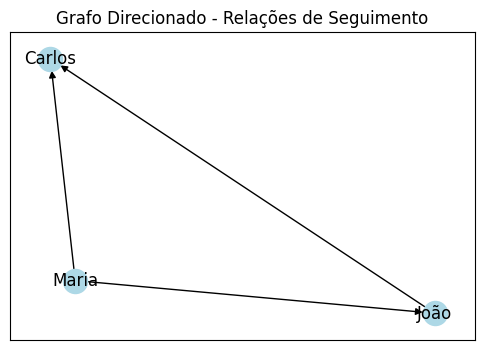

In [86]:
import matplotlib.pyplot as plt

# 🔹 Cria uma figura com tamanho definido para exibição do grafo
plt.figure(figsize=(6,4))

# 🔹 Desenha o grafo na tela
nx.draw_networkx(
    G,                     # O grafo a ser desenhado
    with_labels=True,      # Mostra os nomes dos nós
    node_color='lightblue',# Cor dos nós
    arrows=True            # Habilita as setas indicando a direção das conexões
)

# 🔹 Título do gráfico
plt.title("Grafo Direcionado - Relações de Seguimento")

# 🔹 Exibe o gráfico
plt.show()

# 📊 Quando usar Grafos?

Grafos são ideais quando o **relacionamento entre os dados é tão importante quanto os próprios dados**.

Use grafos quando:
- Precisa encontrar **conexões indiretas** entre elementos (ex: amigos de amigos).
- Precisa analisar **redes complexas**: redes sociais, logística, recomendação, fraude, etc.
- A modelagem com tabelas relacionais ficaria **muito complexa e com muitos joins**.

---

# 📌 Casos de Uso Reais

| Área | Exemplo de Uso |
|------|----------------|
| **Redes Sociais** | "Quem segue quem", "amigos em comum", "grau de separação" |
| **Logística / Transporte** | Cálculo de rotas, menor caminho, entrega otimizada |
| **Recomendações** | Produtos conectados por comportamento de usuários |
| **Detecção de Fraudes** | Relações entre contas bancárias, transações e padrões suspeitos |
| **Genética / Biologia** | Relações entre genes, proteínas e doenças |
| **Cinemas / Filmes** | Ator-trabalhou-em-Filme → para recomendações ou conexões |

---

# 🧰 Comandos úteis em `networkx`

| Comando | Explicação |
|--------|------------|
| `G.add_node('X')` | Adiciona um nó (vértice) |
| `G.add_edge('A', 'B')` | Adiciona uma aresta entre A e B (direcionada se `DiGraph`) |
| `G.nodes` | Lista todos os nós |
| `G.edges` | Lista todas as conexões (arestas) |
| `G.successors('X')` | Nós que recebem aresta a partir de X |
| `G.predecessors('X')` | Nós que apontam para X |
| `nx.shortest_path(G, 'A', 'B')` | Caminho mais curto entre A e B |
| `nx.degree(G)` | Quantidade de conexões de cada nó |
| `nx.closeness_centrality(G)` | Grau de "influência" dos nós na rede |
| `nx.draw_networkx(G)` | Visualiza o grafo |

---

# 🔗 Relação com Neo4j

- `networkx` simula em Python o que bancos como **Neo4j** fazem com dados persistidos.
- Em Neo4j, os comandos são em **Cypher** (ex: `MATCH (a)-[:AMIGO]->(b)`), mas a lógica de nós e conexões é idêntica.
- É comum usar `networkx` para:
  - prototipar soluções de grafos localmente.
  - treinar e visualizar pequenos conjuntos de dados.
  - desenvolver algoritmos que depois podem ser adaptados para ambientes com **Neo4j** ou **Amazon Neptune**.

---

# 🔁 Comparação de Comandos: `networkx` (Python) vs. Neo4j (Cypher)

| Objetivo                          | `networkx` (Python)                                   | Neo4j (Cypher)                                                   |
|----------------------------------|-------------------------------------------------------|------------------------------------------------------------------|
| ➕ Adicionar um nó               | `G.add_node("Maria")`                                 | `CREATE (m:Pessoa {nome: 'Maria'})`                             |
| 🔗 Criar relação (aresta)        | `G.add_edge("Maria", "João")`                         | `MATCH (a:Pessoa {nome:'Maria'}), (b:Pessoa {nome:'João'})`<br>`CREATE (a)-[:SEGUE]->(b)` |
| 👀 Listar nós                    | `G.nodes`                                             | `MATCH (n) RETURN n`                                            |
| 🔍 Listar arestas                | `G.edges`                                             | `MATCH ()-[r]->() RETURN r`                                     |
| 🔁 Sucessores (grafo direcionado)| `list(G.successors("Maria"))`                         | `MATCH (m:Pessoa {nome:'Maria'})-[:SEGUE]->(s) RETURN s`        |
| 🔁 Predecessores                 | `list(G.predecessors("João"))`                        | `MATCH (p)-[:SEGUE]->(j:Pessoa {nome:'João'}) RETURN p`         |
| 🧭 Caminho mais curto            | `nx.shortest_path(G, "Maria", "Carlos")`             | `MATCH p=shortestPath((a:Pessoa {nome:'Maria'})-[*]->(b:Pessoa {nome:'Carlos'})) RETURN p` |
| 📊 Grau de conexão (degree)     | `G.degree("Maria")`                                   | `MATCH (n:Pessoa {nome:'Maria'})-[r]-() RETURN COUNT(r)`        |
| 🎯 Centralidade (influência)    | `nx.closeness_centrality(G)`                          | (Requer APOC ou análise via Neo4j Graph Data Science)           |
| 📈 Visualizar grafo             | `nx.draw_networkx(G)`                                 | Visual via Neo4j Browser ou Bloom                               |

---

# 🧠 Dica Final

Modelos baseados em grafos são **mais flexíveis** para representar conexões complexas.

> Se você precisa **entender relações**, **descobrir padrões** ou **otimizar caminhos**, pense em usar grafos.



## 🕵️‍♀️ Atividade: Detecção de Fraudes com Grafos

### 🧠 Cenário
Você trabalha em uma instituição financeira que deseja detectar possíveis fraudes bancárias. Para isso, você analisará **relações entre contas bancárias e transações** usando **grafos direcionados**.

Cada **nó** representa uma **conta bancária**.  
Cada **aresta** representa uma **transação**, com direção da origem para o destino.

---

### 📊 Objetivo da atividade
- Modelar um grafo com contas e transações
- Detectar **caminhos incomuns** entre contas
- Identificar **contas intermediárias suspeitas**
- Simular um caso de **lavagem de dinheiro**



---

### 📊 Gráfico 1 – Transações Suspeitas (vermelho)


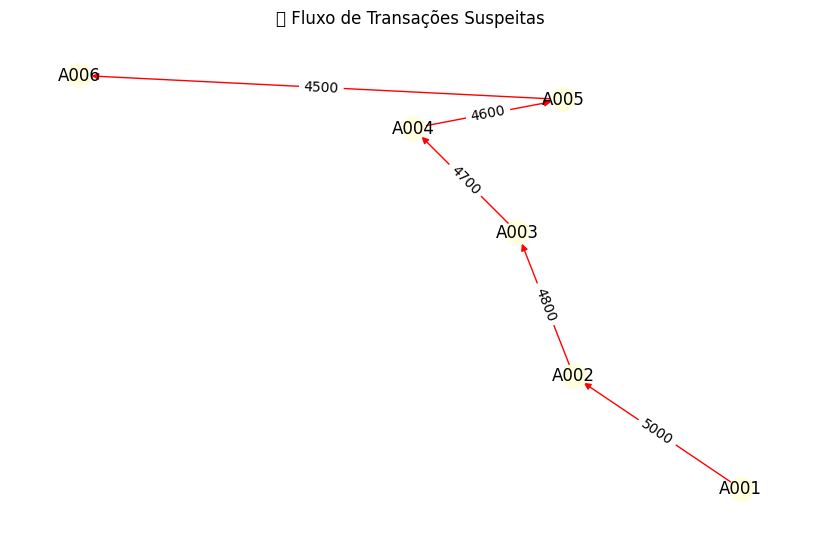

In [90]:
import networkx as nx
import matplotlib.pyplot as plt

# Cria o grafo direcionado
G1 = nx.DiGraph()

# Nós
contas = ["A001", "A002", "A003", "A004", "A005", "A006"]
G1.add_nodes_from(contas)

# Arestas suspeitas
G1.add_edge("A001", "A002", valor=5000)
G1.add_edge("A002", "A003", valor=4800)
G1.add_edge("A003", "A004", valor=4700)
G1.add_edge("A004", "A005", valor=4600)
G1.add_edge("A005", "A006", valor=4500)

# Plot
plt.figure(figsize=(8, 5))
pos = nx.spring_layout(G1, seed=42)
nx.draw(G1, pos, with_labels=True, node_color='lightyellow', edge_color='red', arrows=True)
nx.draw_networkx_edge_labels(G1, pos, edge_labels=nx.get_edge_attributes(G1, 'valor'))
plt.title("🚨 Fluxo de Transações Suspeitas")
plt.show()


- Representa um fluxo **linear e encadeado** de transações:  
  `A001 → A002 → A003 → A004 → A005 → A006`

- Os valores são **altos e decrescentes**:  
  `5000 → 4800 → 4700 → 4600 → 4500`

#### 🔍 Interpretação:
- Esse padrão é típico de **lavagem de dinheiro**, onde o valor original é diluído em várias contas.
- A estrutura **sem ramificações** é um indício de automação ou fraude coordenada.
- A conta **A006**, no final da cadeia, pode representar um **"laranja"**.
- A ausência de caminhos de retorno sugere **movimentação unidirecional**, típica de atividades ilícitas.


### 📊 Gráfico 2 – Transações Legítimas (verde)


In [88]:
# Adiciona arestas (transações suspeitas)
G.add_edge("A001", "A002", valor=1000)

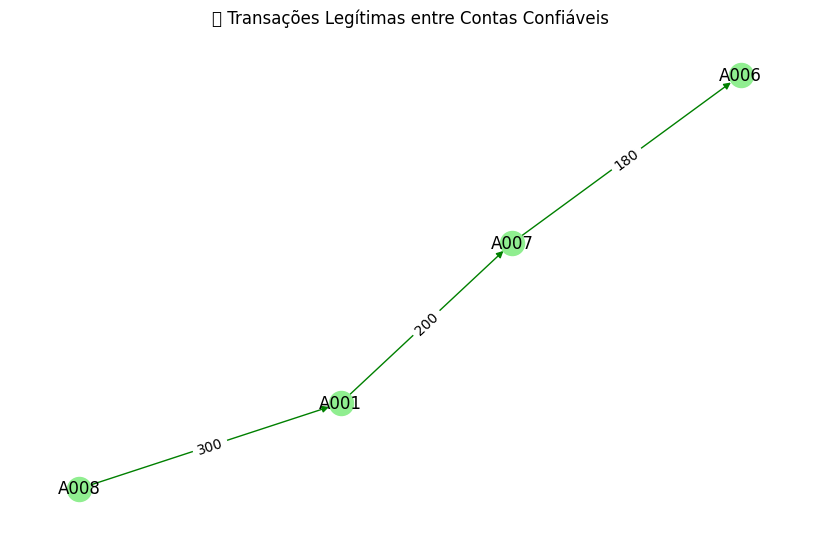

In [94]:
import networkx as nx
import matplotlib.pyplot as plt

# Cria o grafo
G2 = nx.DiGraph()

# Nós envolvidos em transações legítimas
G2.add_nodes_from(["A001", "A006", "A007", "A008"])

# Arestas legítimas
G2.add_edge("A001", "A007", valor=200)     # Transação pequena confiável
G2.add_edge("A007", "A006", valor=180)     # Outra transação pequena
G2.add_edge("A008", "A001", valor=300)     # Reverso, ainda legítimo

# Plot
plt.figure(figsize=(8, 5))
pos = nx.spring_layout(G2, seed=42)
nx.draw(G2, pos, with_labels=True, node_color='lightgreen', edge_color='green', arrows=True)
nx.draw_networkx_edge_labels(G2, pos, edge_labels=nx.get_edge_attributes(G2, 'valor'))
plt.title("✅ Transações Legítimas entre Contas Confiáveis")
plt.show()


- Simula transações **comuns e descentralizadas** entre contas:
  - `A001 → A007 → A006` (valores pequenos: 200 e 180)
  - `A008 → A001` (300) – exemplo de retorno de valores

#### 🔍 Interpretação:
- Os valores são baixos e plausíveis para transações normais (como pagamento de serviços, empréstimos entre pessoas, etc.).
- O fluxo **não linear** e **com retornos** simula uma rede de relacionamentos reais.
- Reforça a ideia de que **grafos legítimos são ramificados e dinâmicos**.
- Pode incluir contas confiáveis com **interações diversas e não sequenciais**.


### 📊 Gráfico 3 – Combinado (Legítimo + Suspeito)

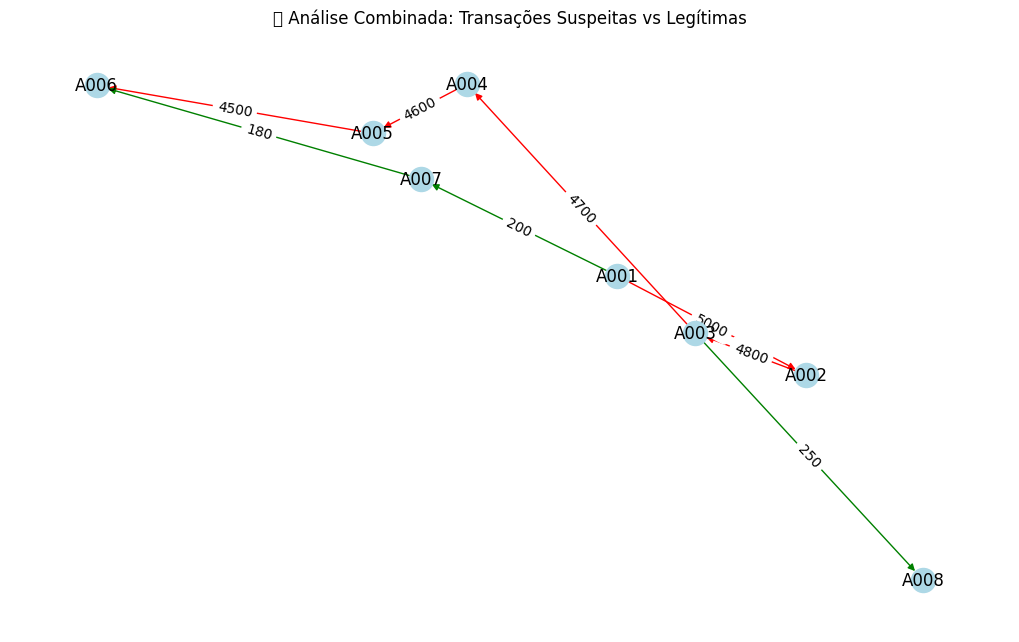

In [95]:
import networkx as nx
import matplotlib.pyplot as plt

# Cria grafo combinado
G3 = nx.DiGraph()

# Nós
contas = ["A001", "A002", "A003", "A004", "A005", "A006", "A007", "A008"]
G3.add_nodes_from(contas)

# Arestas suspeitas (vermelhas)
G3.add_edge("A001", "A002", valor=5000, tipo='suspeita')
G3.add_edge("A002", "A003", valor=4800, tipo='suspeita')
G3.add_edge("A003", "A004", valor=4700, tipo='suspeita')
G3.add_edge("A004", "A005", valor=4600, tipo='suspeita')
G3.add_edge("A005", "A006", valor=4500, tipo='suspeita')

# Arestas legítimas (verdes)
G3.add_edge("A001", "A007", valor=200, tipo='legitima')
G3.add_edge("A007", "A006", valor=180, tipo='legitima')
G3.add_edge("A003", "A008", valor=250, tipo='legitima')

# Layout e plot
plt.figure(figsize=(10, 6))
pos = nx.spring_layout(G3, seed=42)

# Cores condicionais
edge_colors = ['red' if G3[u][v]['tipo'] == 'suspeita' else 'green' for u, v in G3.edges()]

nx.draw(G3, pos, with_labels=True, node_color='lightblue', edge_color=edge_colors, arrows=True)
nx.draw_networkx_edge_labels(G3, pos, edge_labels={(u, v): G3[u][v]['valor'] for u, v in G3.edges()})
plt.title("🔍 Análise Combinada: Transações Suspeitas vs Legítimas")
plt.show()


- Mostra ambos os padrões sobrepostos no mesmo grafo:
  - **🔴 Transações suspeitas** (linha contínua com valores altos)
  - **🟢 Transações legítimas** (valores pequenos, caminhos variados)

#### 🔍 Interpretação:
- Permite comparar diretamente **comportamentos distintos** dentro do mesmo sistema.
- Ajuda a treinar o olhar do analista para identificar **anomalias estruturais**.
- Conta com **nós compartilhados** (como A001), que podem atuar como **pontos de bifurcação** entre fluxos legítimos e suspeitos.

---

### 🧠 O que o aluno deve aprender?

- Como usar grafos para **detectar padrões suspeitos** em transações financeiras.
- A diferença visual entre:
  - Um fluxo fraudulento (sequencial, valores altos, sem retorno)
  - Um fluxo legítimo (descentralizado, múltiplas direções, valores baixos)
- A importância da **visualização e análise topológica** para investigações de fraudes.

---

## ⚖️ Comparativo Estratégico – Cassandra vs Outros Bancos NoSQL

| Critério                        | **Cassandra**                          | **MongoDB**                          | **Redis**                            | **Bancos de Grafos (ex: Neo4j)**          |
|--------------------------------|----------------------------------------|--------------------------------------|--------------------------------------|-------------------------------------------|
| 📄 Tipo de dados               | Tabelas com chave primária e partições | Documentos JSON                      | Chave-valor (e estruturas internas)  | Nós, Arestas, Propriedades                |
| 🔁 Modelo de consistência      | Eventual (configurável)               | Forte/replicável com eventual        | Eventual, por padrão                 | Forte em transações entre nós            |
| 🚀 Performance em escrita      | Altíssima                             | Boa                                  | Excelente                            | Moderada                                 |
| 📊 Consultas flexíveis         | Limitadas (sem join, group by)        | Alta (com filtros, arrays, agregação)| Baixa (requere modelagem manual)     | Muito alta (caminhos, padrões complexos) |
| 🔗 Relacionamentos             | Não indicado                          | Possível, mas limitado               | Não indicado                         | Altamente indicado                       |
| 🌍 Multi datacenter            | Suporte nativo                        | Requer configuração extra            | Suporte via Redis Enterprise         | Possível em algumas versões              |
| 🏗️ Escalabilidade horizontal   | Sim, nativamente                      | Sim (sharding)                       | Sim                                  | Limitado                                 |
| 📚 Casos típicos               | IoT, logs, tempo real, métricas       | CMS, apps web, e-commerce            | Cache, sessões, filas, ranking       | Redes sociais, fraude, rota, recomendação |

---

## 🎯 Casos Reais

- **Cassandra** → Netflix, Uber, Spotify
- **MongoDB** → eBay, Forbes, The New York Times
- **Redis** → Twitter, GitHub, StackOverflow
- **Neo4j (Grafos)** → LinkedIn, NASA, Siemens, DHL

---

## ✅ Conclusão

Cada banco NoSQL resolve um **problema específico**:

- **Cassandra**: ideal para grandes volumes de dados em alta velocidade com replicação global.
- **MongoDB**: flexível para apps que precisam de documentos complexos e buscas variadas.
- **Redis**: inigualável em **cache**, filas e operações em memória.
- **Grafos**: excelente para modelar conexões, redes sociais, fraudes e roteamento.

---

## 📌 Dica para projetos reais:

> Escolha o banco NoSQL **com base no padrão de leitura e escrita** da sua aplicação, não apenas na tecnologia mais popular.